In [ ]:
# Dataset loading from util libary
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

def add_intercept(x):
     """Add intercept to matrix x.

     Args:
         x: 2D NumPy array.

     Returns:
         New matrix same as x with 1's in the 0th column.
     """
     new_x = np.zeros((x.shape[0], x.shape[1] + 1), dtype=x.dtype)
     new_x[:, 0] = 1
     new_x[:, 1:] = x

     return new_x

def load_dataset(csv_path, label_col='y', add_intercept=False):
     """Load dataset from a CSV file.

     Args:
          csv_path: Path to CSV file containing dataset.
          label_col: Name of column to use as labels (should be 'y' or 't').
          add_intercept: Add an intercept entry to x-values.

     Returns:
         xs: Numpy array of x-values (inputs).
         ys: Numpy array of y-values (labels).
     """

     def add_intercept_fn(x):
         global add_intercept
         return add_intercept(x)

     # Validate label_col argument
     #allowed_label_cols = ('y', 't')
     #if label_col not in allowed_label_cols:
     #    raise ValueError('Invalid label_col: {} (expected {})'
     #                     .format(label_col, allowed_label_cols))

     # Load headers
     with open(csv_path, 'r') as csv_fh:
         headers = csv_fh.readline().strip().split(',')

     # Load features and labels
     x_cols = [i for i in range(len(headers)) if headers[i] != label_col]
     l_cols = [i for i in range(len(headers)) if headers[i] == label_col]
     inputs = np.loadtxt(csv_path, delimiter=',', skiprows=1, usecols=x_cols)
     labels = np.loadtxt(csv_path, delimiter=',', skiprows=1, usecols=l_cols)

     if inputs.ndim == 1:
         inputs = np.expand_dims(inputs, -1)

     if add_intercept:
         inputs = add_intercept_fn(inputs)

     return inputs, labels

x,y = load_dataset('heart_failure_clinical_records_dataset.csv', label_col='DEATH_EVENT', add_intercept=False)
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=42)
print("Training samples: ", len(X_train))
print("Testing samples: ", len(X_test))
#print(x[0,0], y[0])

Training samples:  200
Testing samples:  99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


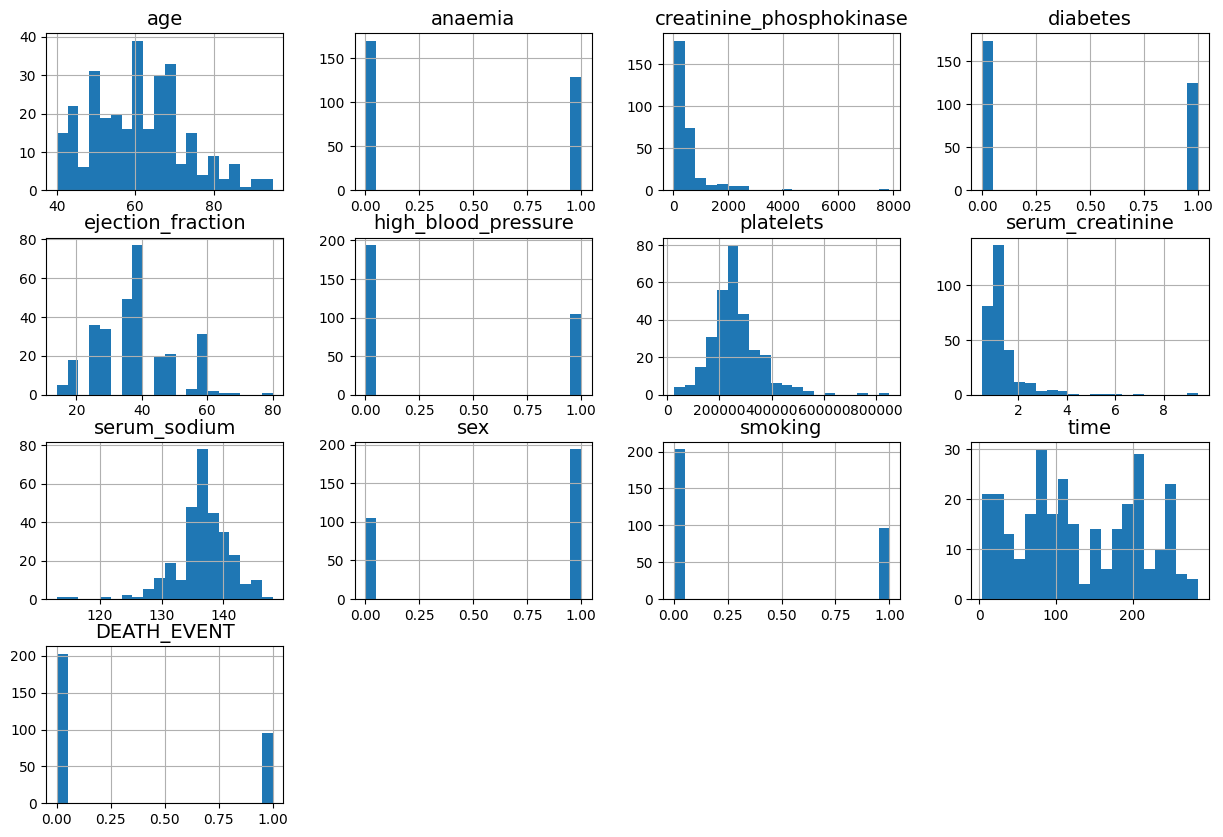

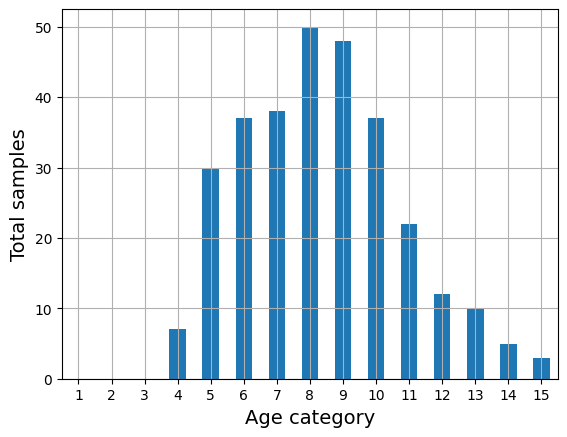

In [ ]:
#Data exploration
import pandas as pd
from pathlib import Path
import numpy as np
hf = pd.read_csv(Path("heart_failure_clinical_records_dataset.csv"))

IMAGES_PATH = Path() / "images" / "heart_failure"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

#1. Take the first look at data
hf.head()

#2. Data columns and their count/types
hf.info()

#3. The mean, median quartile of data
hf.describe()

#4. Plot data as histogram
import matplotlib.pyplot as plt
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
hf.hist(bins=20, figsize=(15,10))
plt.show()

#5. Age category proportions??

hf["age_cat"] = pd.cut(hf["age"],
                               bins=[0.,20.,30.,35.,40.,45.,50.,55.,60.,65.,70.,75.,80.,85.,90.,np.inf],
                               labels=[1, 2, 3, 4, 5,6,7,8,9,10,11,12,13,14,15])
hf["age_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Age category")
plt.ylabel("Total samples")
#save_fig("age_cat_bar_plot")  # extra code
plt.show()
#TODO

#6. Stratified split

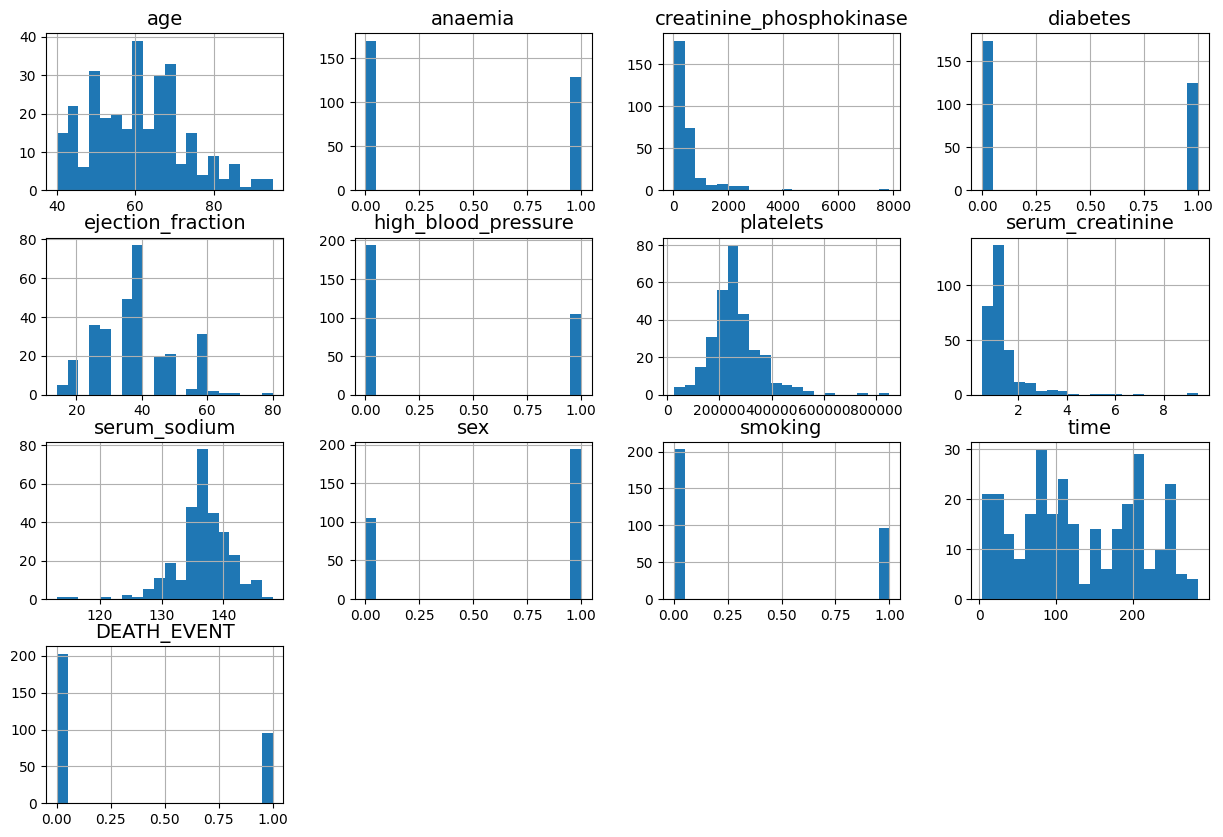

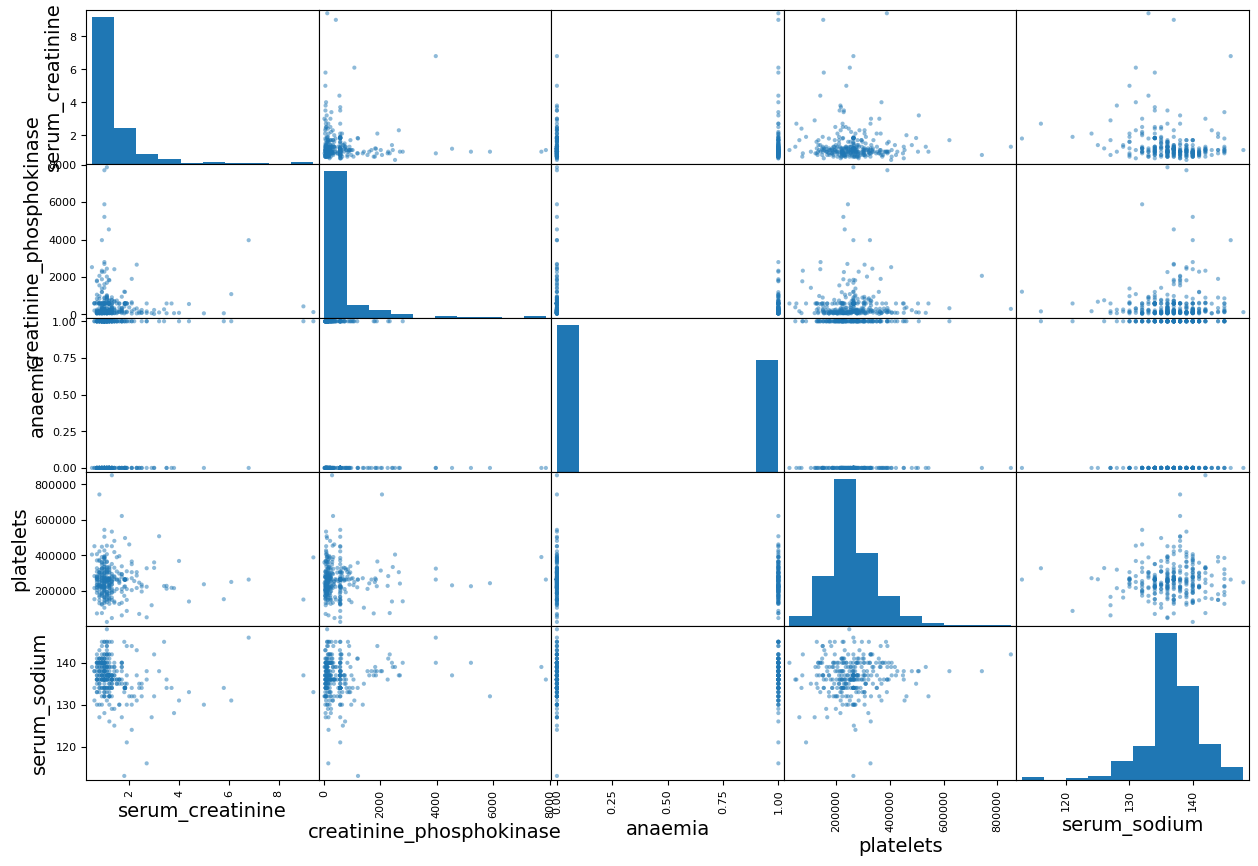

DEATH_EVENT                 1.000000
creatine_per_sodium         0.299280
serum_creatinine            0.294278
age                         0.253729
high_blood_pressure         0.079351
anaemia                     0.066270
phosphokinase_per_sodium    0.063960
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
sex                        -0.004316
smoking                    -0.012623
platelets_per_sodium       -0.034381
platelets                  -0.049139
serum_sodium               -0.195204
ejection_fraction          -0.268603
time                       -0.526964
Name: DEATH_EVENT, dtype: float64

In [ ]:
# Scatter matrix of different features and creating new features
# Correlation matrix
import pandas as pd
from pathlib import Path
hf = pd.read_csv(Path("heart_failure_clinical_records_dataset.csv"))
import matplotlib.pyplot as plt
#corr_matrix = hf.corr()
import numpy as np
#print(corr_matrix["DEATH_EVENT"].sort_values(ascending=False))

from pandas.plotting import scatter_matrix
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
hf.hist(bins=20, figsize=(15,10))
attributes = ["DEATH_EVENT", "age", "serum_creatinine", "time"]
attributes = ["serum_creatinine", "creatinine_phosphokinase", "anaemia", "platelets", "serum_sodium"]
scatter_matrix(hf[attributes], figsize=(15,10))
plt.show()

hf["creatine_per_sodium"] = hf["serum_creatinine"] / hf["serum_sodium"]
hf["platelets_per_sodium"] = hf["platelets"] / hf["serum_sodium"]
hf["phosphokinase_per_sodium"] = hf["creatinine_phosphokinase"] / hf["serum_sodium"]
newcorr = hf.corr()
newcorr["DEATH_EVENT"].sort_values(ascending=False)


In [ ]:
#Clean the data, filling in missing values and imputing values
import pandas as pd
from pathlib import Path
hf = pd.read_csv(Path("heart_failure_clinical_records_dataset.csv"))
import matplotlib.pyplot as plt
import numpy as np

# Handle missing values
#median = hf["platelets"].median()
#print(median)
#hf["platelets"].fillna(median, inplace=True)

# Impute values ie change missing values to mean
# apply same tranformation to test train and validation set: KNN imputer, iterative imputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

hf_num = hf.select_dtypes(include=[np.number])
imputer.fit(hf_num)

print(imputer.statistics_)
print(hf_num.median().values)

x = imputer.transform(hf_num)

# dealing with outliers
from sklearn.ensemble import IsolationForest
isolationFt = IsolationForest(random_state=42)
isolationPred = isolationFt.fit_predict(x)
isolationPred

[6.00e+01 0.00e+00 2.50e+02 0.00e+00 3.80e+01 0.00e+00 2.62e+05 1.10e+00
 1.37e+02 1.00e+00 0.00e+00 1.15e+02 0.00e+00]
[6.00e+01 0.00e+00 2.50e+02 0.00e+00 3.80e+01 0.00e+00 2.62e+05 1.10e+00
 1.37e+02 1.00e+00 0.00e+00 1.15e+02 0.00e+00]


array([-1, -1, -1,  1, -1, -1,  1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,
       -1,  1, -1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,
       -1,  1, -1, -1, -1, -1,  1, -1, -1,  1, -1, -1, -1, -1, -1,  1,  1,
       -1, -1,  1, -1, -1,  1,  1,  1, -1, -1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1, -1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1, -1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1, -1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1, -1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1, -1

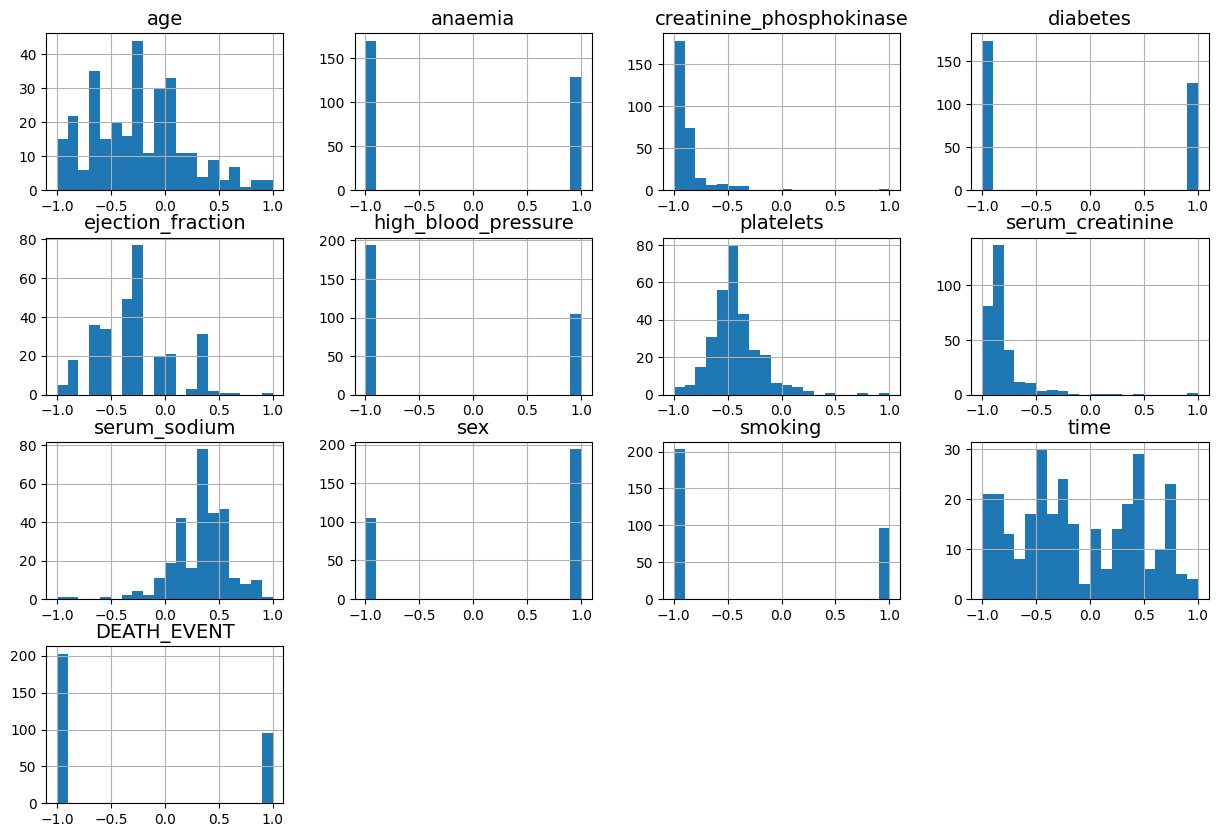

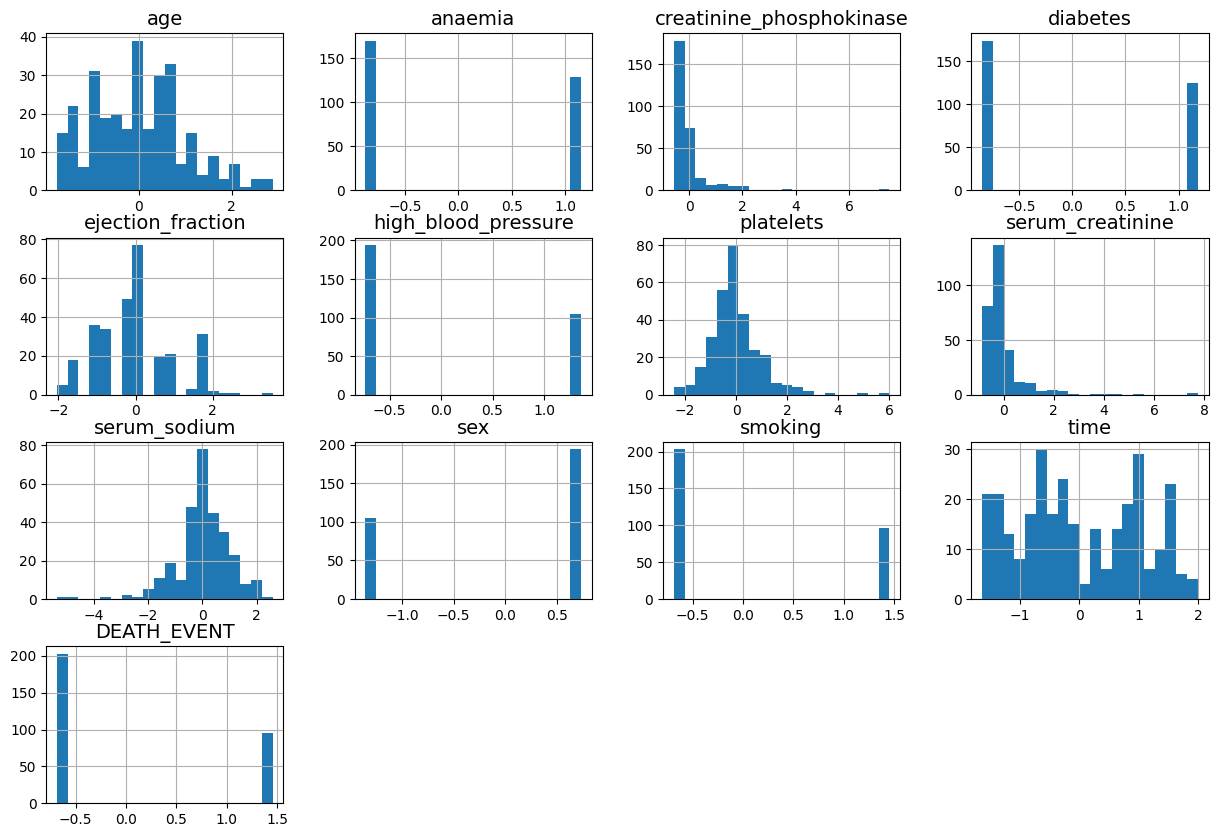

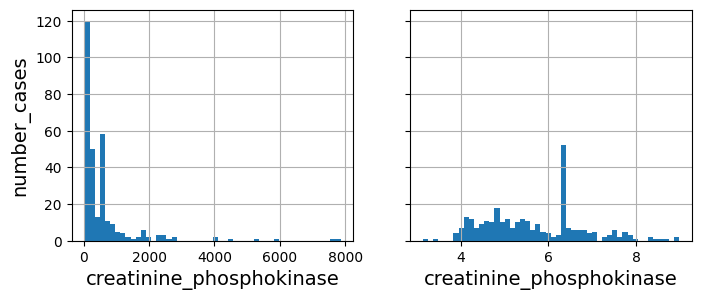

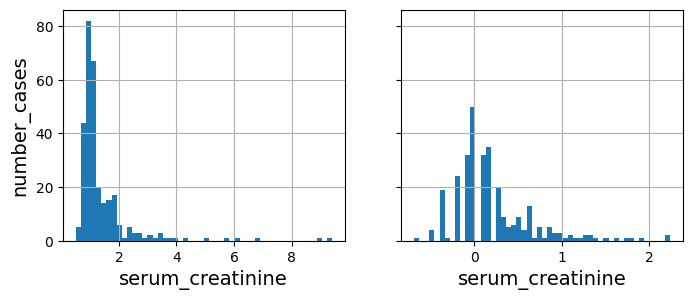

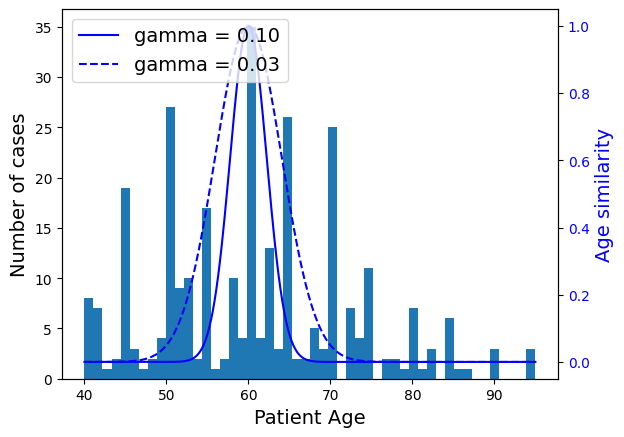

In [ ]:
# Feature scaling and transformation
#min-max scaling and standarization
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

hf = pd.read_csv(Path("heart_failure_clinical_records_dataset.csv"))
hf_num = hf.select_dtypes(include=[np.number])

from sklearn.preprocessing import StandardScaler, MinMaxScaler

min_max_scalar = MinMaxScaler(feature_range=(-1,1))
hf_minmax_scaled = min_max_scalar.fit_transform(hf_num)

std_scalar = StandardScaler()
hf_std_scaled = std_scalar.fit_transform(hf_num)

hf_tr_min_max = pd.DataFrame(hf_minmax_scaled, columns=hf_num.columns)
hf_tr_std = pd.DataFrame(hf_std_scaled, columns=hf_num.columns)
hf_tr_min_max.hist(bins=20, figsize=(15,10))
hf_tr_std.hist(bins=20, figsize=(15,10))
plt.show()

# Convert long tailed data to uniform distribution
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
hf["creatinine_phosphokinase"].hist(ax=axs[0], bins=50)
hf["creatinine_phosphokinase"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("creatinine_phosphokinase")
axs[1].set_xlabel("creatinine_phosphokinase")
axs[0].set_ylabel("number_cases")
#save_fig("long_tail_plot")
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
hf['serum_creatinine'].hist(ax=axs[0], bins=50)
hf['serum_creatinine'].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("serum_creatinine")
axs[1].set_xlabel("serum_creatinine")
axs[0].set_ylabel("number_cases")

plt.show()

from sklearn.metrics.pairwise import rbf_kernel
# new feature after rbf kernel transformation
age_simil_60 = rbf_kernel(hf[['age']], [[60]], gamma=0.1)

ages = np.linspace(hf["age"].min(),
                   hf["age"].max(),
                   500).reshape(-1, 1)
gamma1 = 0.1
gamma2 = 0.03
rbf1 = rbf_kernel(ages, [[60]], gamma=gamma1)
rbf2 = rbf_kernel(ages, [[60]], gamma=gamma2)

fig, ax1 = plt.subplots()

ax1.set_xlabel("Patient Age")
ax1.set_ylabel("Number of cases")
ax1.hist(hf["age"], bins=50)

ax2 = ax1.twinx()  # create a twin axis that shares the same x-axis
color = "blue"
ax2.plot(ages, rbf1, color=color, label="gamma = 0.10")
ax2.plot(ages, rbf2, color=color, label="gamma = 0.03", linestyle="--")
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel("Age similarity", color=color)

plt.legend(loc="upper left")
#save_fig("age_similarity_plot")
plt.show()


In [ ]:
# clustering and measuring similarity
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

hf = pd.read_csv(Path("heart_failure_clinical_records_dataset.csv"))

from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=2, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)

    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
similarities = cluster_simil.fit_transform(hf[["serum_creatinine"]], sample_weight=hf['DEATH_EVENT'])
similarities[:3].round(2)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[0.49, 0.  , 0.  , 0.85, 0.37, 0.22, 0.99, 0.  , 0.78, 0.02],
       [1.  , 0.  , 0.  , 0.24, 0.04, 0.83, 0.59, 0.  , 0.91, 0.  ],
       [0.94, 0.  , 0.  , 0.37, 0.08, 0.68, 0.76, 0.  , 0.99, 0.  ]])

In [ ]:
#Making pipelines
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

hf = pd.read_csv(Path("heart_failure_clinical_records_dataset.csv"))

num_pipeline = Pipeline([
   ("impute", SimpleImputer(strategy="median")),
   ("standardize", StandardScaler())
])

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())
preprocessing = ColumnTransformer([
        ("log", log_pipeline, ["creatinine_phosphokinase", "platelets", "serum_creatinine",
                               "serum_sodium"]),
        ("geo", cluster_simil, ["serum_creatinine"]),
    ],
    remainder=default_num_pipeline)

hf = pd.read_csv(Path("heart_failure_clinical_records_dataset.csv"))
hf_prep = preprocessing.fit_transform(hf)
hf_prep.shape
print(preprocessing.get_feature_names_out())


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


['log__creatinine_phosphokinase' 'log__platelets' 'log__serum_creatinine'
 'log__serum_sodium' 'geo__Cluster 0 similarity'
 'geo__Cluster 1 similarity' 'geo__Cluster 2 similarity'
 'geo__Cluster 3 similarity' 'geo__Cluster 4 similarity'
 'geo__Cluster 5 similarity' 'geo__Cluster 6 similarity'
 'geo__Cluster 7 similarity' 'geo__Cluster 8 similarity'
 'geo__Cluster 9 similarity' 'remainder__age' 'remainder__anaemia'
 'remainder__diabetes' 'remainder__ejection_fraction'
 'remainder__high_blood_pressure' 'remainder__sex' 'remainder__smoking'
 'remainder__time' 'remainder__DEATH_EVENT']


Build and Train models

In [6]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import pandas as pd
from pathlib import Path
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted


from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=2, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)

    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

hf = pd.read_csv(Path("heart_failure_clinical_records_dataset.csv"))

num_pipeline = Pipeline([
   ("impute", SimpleImputer(strategy="median")),
   ("standardize", StandardScaler())
])

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())
preprocessing = ColumnTransformer([
        ("log", log_pipeline, ["creatinine_phosphokinase", "platelets", "serum_creatinine",
                               "serum_sodium"]),
        ("geo", cluster_simil, ["serum_creatinine"]),
    ],
    remainder=default_num_pipeline)

hf = pd.read_csv(Path("heart_failure_clinical_records_dataset.csv"))
hf_labels = hf["DEATH_EVENT"].copy()

hf_train = hf.drop("DEATH_EVENT", axis=1)

from sklearn.model_selection import train_test_split

#strat_train_set, strat_test_set = train_test_split(
 #   hf, test_size=0.2, random_state=42)

#hf_train = strat_train_set.drop("DEATH_EVENT", axis=1)
#hf_train_labels = strat_train_set["DEATH_EVENT"].copy()


from sklearn.linear_model import LogisticRegression

lin_reg = make_pipeline(preprocessing, LogisticRegression)

lin_reg.fit(hf_train, hf_labels)
print(lin_reg.score(hf_test, y=hf_test_labels))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NameError: ignored

===== 
 LogisticRegression   LogisticRegression()  
Score of classifier :  0.7777777777777778
Score with straified cross validation
0.835820895522388
0.8507462686567164
0.7272727272727273
Confusion matrix: 
 [[133  13]
 [ 26  28]]
Precision score is  0.6829268292682927
Recall score is  0.5185185185185185
F1 score is  0.5894736842105263


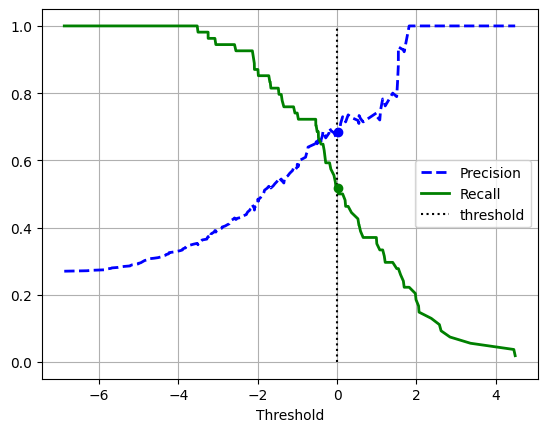

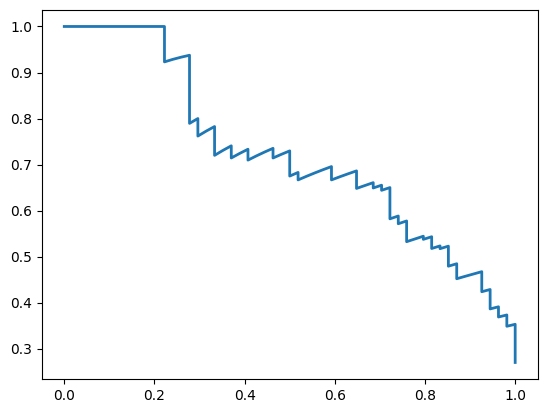

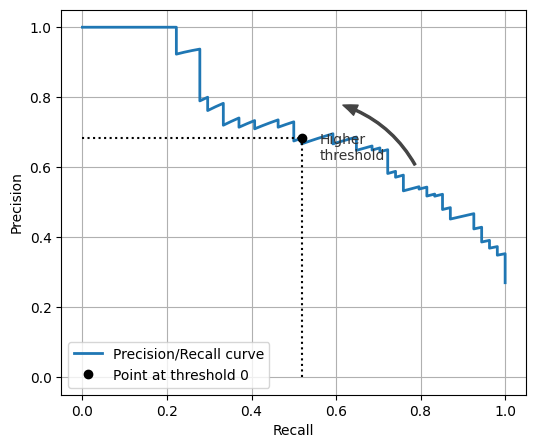

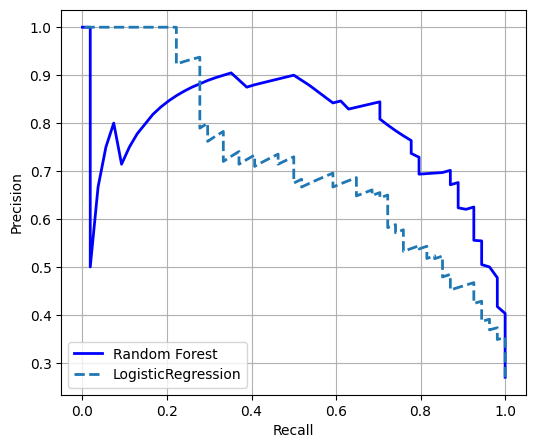

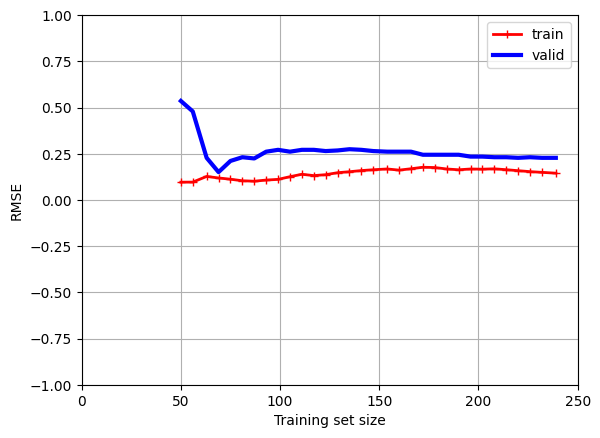

===== 
 Linear SVM   SVC(C=0.025, kernel='linear', random_state=42)  
Score of classifier :  0.696969696969697
Score with straified cross validation
0.8059701492537313
0.7761194029850746
0.7727272727272727
Confusion matrix: 
 [[142   4]
 [ 39  15]]
Precision score is  0.7894736842105263
Recall score is  0.2777777777777778
F1 score is  0.410958904109589


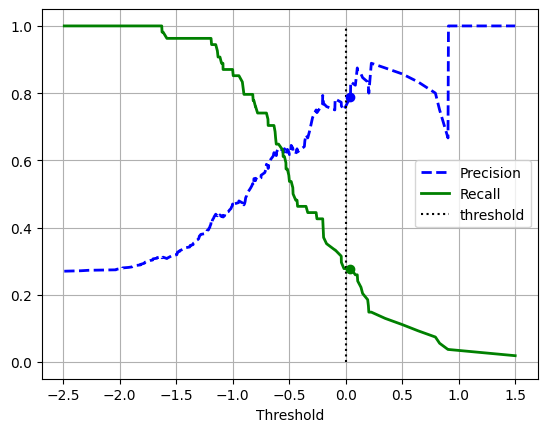

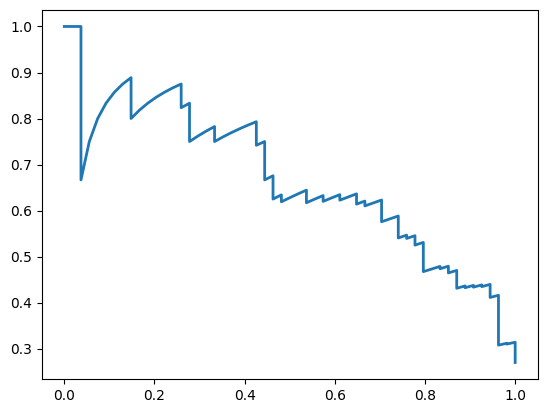

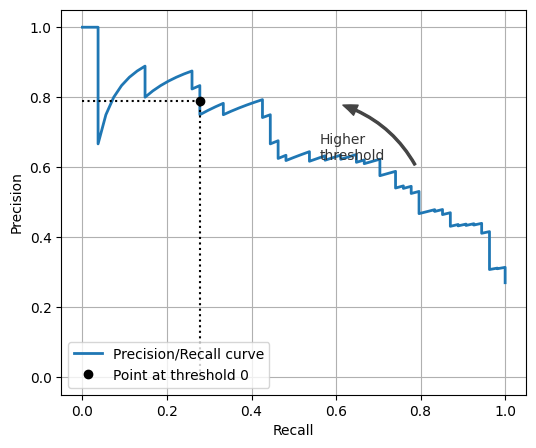

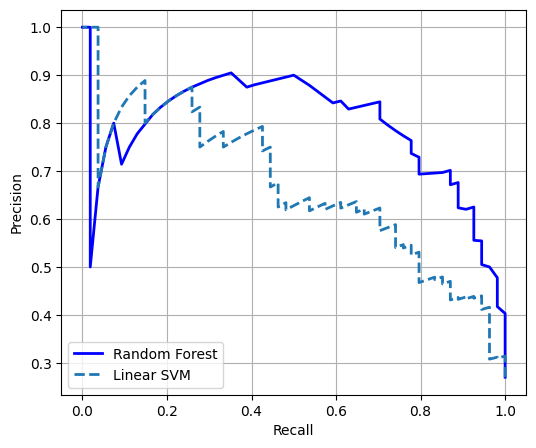

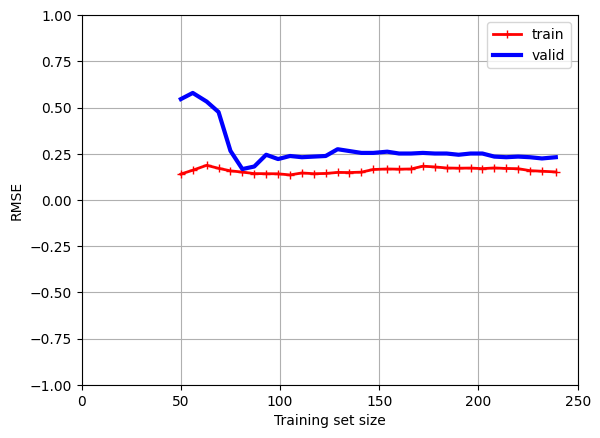

In [65]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier

def add_intercept(x):
     """Add intercept to matrix x.

     Args:
         x: 2D NumPy array.

     Returns:
         New matrix same as x with 1's in the 0th column.
     """
     new_x = np.zeros((x.shape[0], x.shape[1] + 1), dtype=x.dtype)
     new_x[:, 0] = 1
     new_x[:, 1:] = x

     return new_x
def load_dataset(csv_path, label_col='y', add_intercept=False):
     def add_intercept_fn(x):
         global add_intercept
         return add_intercept(x)

     # Validate label_col argument
     #allowed_label_cols = ('y', 't')
     #if label_col not in allowed_label_cols:
     #    raise ValueError('Invalid label_col: {} (expected {})'
     #                     .format(label_col, allowed_label_cols))

     # Load headers
     with open(csv_path, 'r') as csv_fh:
         headers = csv_fh.readline().strip().split(',')

     # Load features and labels
     x_cols = [i for i in range(len(headers)) if headers[i] != label_col]
     l_cols = [i for i in range(len(headers)) if headers[i] == label_col]
     inputs = np.loadtxt(csv_path, delimiter=',', skiprows=1, usecols=x_cols)
     labels = np.loadtxt(csv_path, delimiter=',', skiprows=1, usecols=l_cols)

     if inputs.ndim == 1:
         inputs = np.expand_dims(inputs, -1)

     if add_intercept:
         inputs = add_intercept_fn(inputs)

     return inputs, labels

names = [
      "LogisticRegression",
      #"Nearest Neighbors",
      "Linear SVM",
      #"RBF SVM",
      #"Gaussian Process",
      #"Decision Tree",
      #"Random Forest",
      #"Neural Net",
      #"AdaBoost",
      #"Naive Bayes",
      #"QDA",
]

classifiers = [
    LogisticRegression(),
      #KNeighborsClassifier(3),
      SVC(kernel="linear", C=0.025, random_state=42),
      #SVC(gamma=2, C=1, random_state=42),
      #GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42),
      #DecisionTreeClassifier(max_depth=5, random_state=42),
      #RandomForestClassifier(
      #    max_depth=5, n_estimators=10, max_features=1, random_state=42
      #),
      #MLPClassifier(alpha=1, max_iter=1000, random_state=42),
      #AdaBoostClassifier(random_state=42),
      #GaussianNB(),
      #QuadraticDiscriminantAnalysis(),
]


x,y = load_dataset('heart_failure_clinical_records_dataset.csv', label_col='DEATH_EVENT', add_intercept=True)
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=42)

for name, clf in zip(names, classifiers):
          print("=====",'\n', name, " ", clf, " ")

          clf = make_pipeline(StandardScaler(), clf)
          clf.fit(X_train, y_train)
          score = clf.score(X_test, y_test)
          print("Score of classifier : ", score)

          #print("Score with Cross Validation", cross_val_score(clf, X_train, y_train, cv=3, scoring="accuracy"))

          dumyclf = DummyClassifier()
          #dummy_clf.fit(X_train, y_train)

          #print("Score dummy classifier with Cross Validation", cross_val_score(dumyclf, X_train, y_train, cv=3, scoring="accuracy"))

          from sklearn.model_selection import StratifiedKFold
          from sklearn.base import clone
          skfolds = StratifiedKFold(n_splits=3)
          print("Score with straified cross validation")
          for train_index, test_index in skfolds.split(X_train, y_train):
            clone_clf = clone(clf)
            X_train_folds, y_train_folds, X_test_fold, y_test_fold = X_train[train_index], y_train[train_index], X_train[test_index], y_train[test_index]
            clone_clf.fit(X_train_folds, y_train_folds)
            y_pred = clone_clf.predict(X_test_fold)
            n_correct = sum(y_pred == y_test_fold)
            print(n_correct /len(y_pred))

          #Confusion Matrix
          from sklearn.model_selection import cross_val_predict
          y_train_pred = cross_val_predict(clf, X_train, y_train, cv=3)

          from sklearn.metrics import confusion_matrix
          cm = confusion_matrix(y_train, y_train_pred)
          print("Confusion matrix: \n", cm)

          from sklearn.metrics import precision_score, recall_score, f1_score
          print("Precision score is ", precision_score(y_train, y_train_pred))
          print("Recall score is ", recall_score(y_train, y_train_pred))
          print("F1 score is ", f1_score(y_train, y_train_pred))

          # precision-recall versus threshold to determine decision boundary
          y_scores = cross_val_predict(clf, X_train, y_train, cv=3, method="decision_function")

          from sklearn.metrics import precision_recall_curve
          threshold = 0
          precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)
          plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
          plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
          plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")
          idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
          plt.plot(thresholds[idx], precisions[idx], "bo")
          plt.plot(thresholds[idx], recalls[idx], "go")
          #plt.axis([-8, 5, 0, 1])
          plt.grid()
          plt.xlabel("Threshold")
          plt.legend(loc="center right")
          plt.show()

          import matplotlib.patches as patches
          plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")
          plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting

          plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")

# extra code – just beautifies and saves Figure 3–6
          plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
          plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
          plt.plot([recalls[idx]], [precisions[idx]], "ko",
          label="Point at threshold 0")
          plt.gca().add_patch(patches.FancyArrowPatch(
          (0.79, 0.60), (0.61, 0.78),
          connectionstyle="arc3,rad=.2",
          arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
          color="#444444"))
          plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")
          plt.xlabel("Recall")
          plt.ylabel("Precision")
          #plt.axis([0, 1, 0, 1])
          plt.grid()
          plt.legend(loc="lower left")
          plt.show()

          from sklearn.metrics import roc_curve
          #precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)
          #fpr, tpr, thresholds = roc_curve(y_train, y_scores)
          #idx_for_90_precision = (precisions >= 0.50)[0]
          #threshold_for_90_precision = thresholds[idx_for_90_precision]
          #idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()

          #tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

          #plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting
          #plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
          #plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
          #plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")

          # extra code – just beautifies and saves Figure 3–7
          #plt.gca().add_patch(patches.FancyArrowPatch((0.20, 0.89), (0.07, 0.70),connectionstyle="arc3,rad=.4",arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",color="#444444"))
          #plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
          #plt.xlabel('False Positive Rate (Fall-Out)')
          #plt.ylabel('True Positive Rate (Recall)')
          #plt.grid()
#plt.axis([0, 1, 0, 1])
          #plt.legend(loc="lower right", fontsize=13)
#save_fig("roc_curve_plot")

          #plt.show()
          from sklearn.ensemble import RandomForestClassifier

          forest_clf = RandomForestClassifier(random_state=42)
          y_probas_forest = cross_val_predict(forest_clf, X_train, y_train, cv=3,
                                    method="predict_proba")
          idx_50_to_60 = (y_probas_forest[:, 1] > 0.50) & (y_probas_forest[:, 1] < 0.60)
          y_scores_forest = y_probas_forest[:, 1]
          precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(
          y_train, y_scores_forest)
          plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting

          plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2,label="Random Forest")
          plt.plot(recalls, precisions, "--", linewidth=2, label=name)

# extra code – just beautifies and saves Figure 3–8
          plt.xlabel("Recall")
          plt.ylabel("Precision")
          #plt.axis([0, 1, 0, 1])
          plt.grid()
          plt.legend(loc="lower left")
          #save_fig("pr_curve_comparison_plot")

          plt.show()


          from sklearn.model_selection import learning_curve
          train_sizes, train_scores, valid_scores = learning_curve(clf, x,y, train_sizes=np.linspace(0.01, 1.0,40), cv=5, scoring="neg_mean_squared_error")
          train_errors = -train_scores.mean(axis=1)
          valid_errors = -valid_scores.mean(axis=1)
          plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
          plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
          plt.legend(loc="upper right")
          plt.xlabel("Training set size")
          plt.ylabel("RMSE")
          plt.grid()
          plt.axis([0, 250, -1, 1])
          #save_fig("learning_curves_plot")
          plt.show()

In [57]:
import sklearn
print(sklearn.metrics.get_scorer_names())

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'matthews_corrcoef', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_negative_likelihood_ratio', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'positive_likelihood_ratio', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weight